
## Exercise 5 Gradient Descent

The goal of this exercise is to understand how the Linear Regression algorithm finds the optimal coefficients.

The goal is to fit a Linear Regression on a one dimensional features data **without using Scikit-learn**. Let's use the data set we generated for the exercise 1:

```python
X, y, coef = make_regression(n_samples=100,
                         n_features=1,
                         n_informative=1,
                         noise=10,
                         coef=True,
                         random_state=0,
                         bias=100.0)
``` 

*Warning: The shape of X is not the same as the shape of y. You may need (for some questions) to reshape X using: `X.reshape(1,-1)[0]`.*

1. Plot the data using matplotlib:

![alt text][ex5q1]

[ex5q1]: images/day1/ex5/w2_day1_ex5_q1.png "Scatter plot "

As a reminder, fitting a Linear Regression on this data means finding (a,b) that fits well the data points.

- `y_pred = a*x +b`

Mathematically, it means finding (a,b) that minimizes the MSE, which is the loss used in Linear Regression. If we consider 3 data points:

- Loss(a,b) = `MSE(a,b) = 1/3 *((y_pred1 - y_true1)**2 + (y_pred2 - y_true2)**2) + (y_pred3 - y_true3)**2)`

and we know:
    y_pred1 = a*x1 + b
    y_pred2 = a*x2 + b
    y_pred3 = a*x3 + b

### Greedy approach

2. Create a function `compute_mse`. Compute mse for `a = 1` and `b = 2`.
**Warning**: `X.shape` is `(100, 1)` and `y.shape` is `(100, )`. Make sure that `y_preds` and `y` have the same shape before to compute `y_preds-y`.

```python
def compute_mse(coefs, X, y):
    '''
    coefs is a list that contains a and b: [a,b]
    X is the features set 
    y is the target

    Returns a float which is the MSE 
    '''

    #TODO

    y_preds = 
    mse = 

    return mse
```

3. Create a grid of **640000** points that combines a and b with. Check that the grid contains 640000 points.

- a between -200 and 200, step= 0.5
- b between -200 and 200, step= 0.5

This is how to compute the grid with the combination of a and b:

```python
aa, bb = np.mgrid[-200:200:0.5, -200:200:0.5]
grid = np.c_[aa.ravel(), bb.ravel()]
```

4. Compute the MSE for all points in the grid. If possible, parallelize the computations. It may be needed to use `functools.partial` to parallelize a function with many parameters on a list. Put the result in a variable named `losses`.

5. Use this chunk of code to plot the MSE in 2D:

```python
aa, bb = np.mgrid[-200:200:.5, -200:200:.5]
grid = np.c_[aa.ravel(), bb.ravel()]
losses_reshaped = np.array(losses).reshape(aa.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(aa,
                    bb,
                    losses_reshaped,
                    100,
                    cmap="RdBu",
                    vmin=0,
                    vmax=160000)
ax_c = f.colorbar(contour)
ax_c.set_label("MSE")

ax.set(aspect="equal",
    xlim=(-200, 200),
    ylim=(-200, 200),
    xlabel="$a$",
    ylabel="$b$")
```

The expected output is:

![alt text][ex5q5]

[ex5q5]: images/day1/ex5/w2_day1_ex5_q5.png "MSE "

6. From the `losses` list, find the optimal value of a and b and plot the line in the scatter point of question 1.

In this example we computed 160 000 times the MSE. It is frequent to deal with 50 features, which requires 51 parameters to fit the Linear Regression. If we try this approach with 50 features we would need to compute **5.07e+132** MSE. Even if we reduce the scope and try only 5 values per coefficients we would have to compute the MSE **4.4409e+35** times. This approach is not scalable and that is why is not used to find optimal coefficients for Linear Regression.

### Gradient Descent

In a nutshel, Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters (a and b) of our model. Parameters refer to the coefficients used in Linear Regression. Before to start implementing the questions, take the time to read the article. https://jairiidriss.medium.com/gradient-descent-algorithm-from-scratch-using-python-2b36c1548917. It explains the gradient descent and how to implement it. The "tricky" part is the computation of the derivative of the mse. You can admit the formulas of the derivatives to implement the gradient descent (`d_theta_0` and `d_theta_1` in the article).

7. Implement the gradient descent to find optimal a and b with `learning rate = 0.1` and `nbr_iterations=100`.

8. Save the a and b through the iterations in a two dimensional numpy array. Add them to the plot of the previous part and observe a and b that converge towards the minimum. The plot should look like this:

![alt text][ex5q8]

[ex5q8]: images/day1/ex5/w2_day1_ex5_q8.png "MSE + Gradient descent"

9. Use Linear Regression from Scikit-learn. Compare the results.


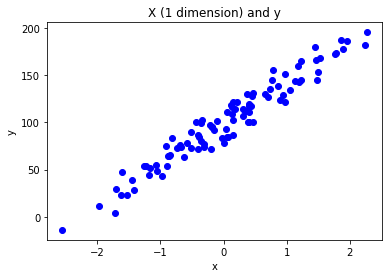

In [6]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X, y, coef = make_regression(n_samples=100,
                         n_features=1,
                         n_informative=1,
                         noise=10,
                         coef=True,
                         random_state=0,
                         bias=100.0)

X.reshape(1,-1)[0]
plt.scatter(X, y,  color='blue')

plt.title('X (1 dimension) and y')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# y_pred = a*x +b
# Loss(a,b) = MSE(a,b) = 1/3 *((y_pred1 - y_true1)**2 + (y_pred2 - y_true2)**2) + (y_pred3 - y_true3)**2)

# and we now
# y_pred1 = a*x1 + b
# y_pred2 = a*x2 + b
# y_pred3 = a*x3 + b

In [7]:
# greedy approach
regr = LinearRegression()
regr.fit(X, y)

def compute_mse(coefs, X, y):
    # y = b + a*x
    y_preds = coefs[1]+ coefs[0]*X
    # a = 1 & b = 2
    # MSE(a,b) = Σ(y_pred_i – y_true_i)**2 / n 
    # MSE(1,2) = 1/2*((y_pred1 - y_true1)**2 + (y_pred2 - y_true2)**2)
    mse = (y_preds.flatten() - y)**2/len(y_preds)
    return mse.sum()

print(compute_mse([1, 2], X, y))
# 11808.867339751561

11808.86733975156


In [8]:
# 3.
aa, bb = np.mgrid[-200:200:0.5, -200:200:0.5]
grid = np.c_[aa.ravel(), bb.ravel()]
print(grid.shape)

(640000, 2)


In [11]:
# 4.
# nice tool
from functools import partial

par_mse = partial(compute_mse, X=X, y=y)
losses = []
for coefs in grid:
    losses.append([par_mse(coefs)])

print(losses[:5])
# array([158315.41493175, 158001.96852692, 157689.02212209, 157376.57571726,
#     157064.62931244, 156753.18290761, 156442.23650278, 156131.79009795,
#     155821.84369312, 155512.39728829])


[[158315.41493175057], [158001.9685269217], [157689.02212209295], [157376.57571726412], [157064.62931243534]]


[None,
 (-200.0, 200.0),
 (-200.0, 200.0),
 Text(0.5, 0, '$a$'),
 Text(0, 0.5, '$b$')]

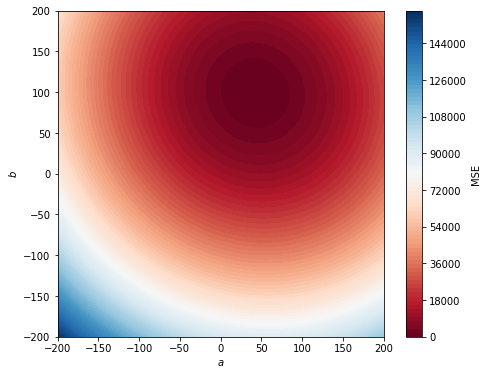

In [13]:
# 5.
aa, bb = np.mgrid[-200:200:.5, -200:200:.5]
grid = np.c_[aa.ravel(), bb.ravel()]
losses_reshaped = np.array(losses).reshape(aa.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(aa,
                    bb,
                    losses_reshaped,
                    100,
                    cmap="RdBu",
                    vmin=0,
                    vmax=160000)
ax_c = f.colorbar(contour)
ax_c.set_label("MSE")

ax.set(aspect="equal",
    xlim=(-200, 200),
    ylim=(-200, 200),
    xlabel="$a$",
    ylabel="$b$")



In [ ]:
# 6.

# array([42.5, 99. ]). It means that a= 42.5 and b=99.